In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

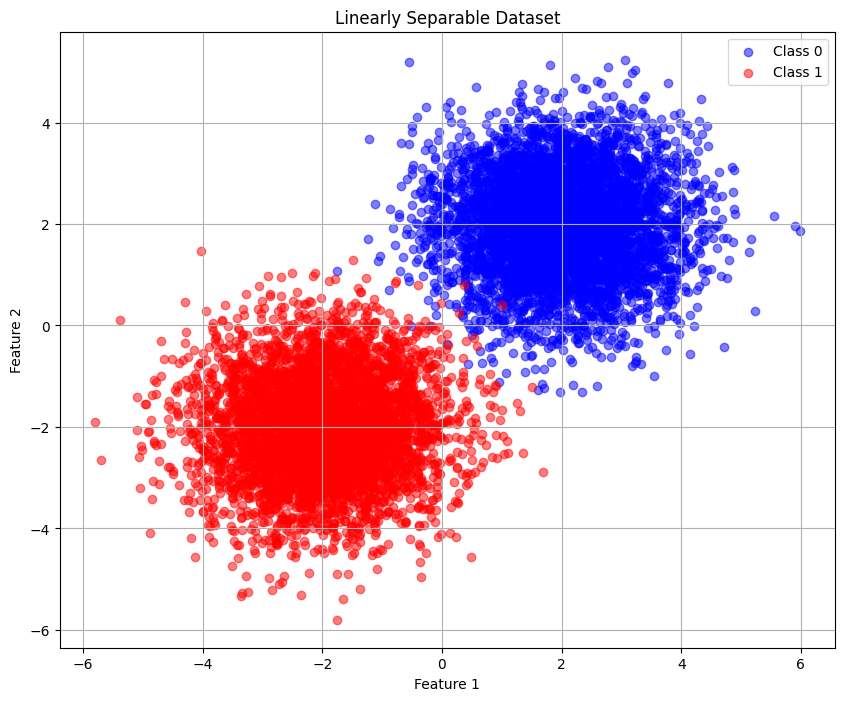

In [2]:
# Set means and covariance matrix for the two Gaussian distributions
mean1 = [2, 2]
mean2 = [-2, -2]
covariance = [[1, 0], [0, 1]]  # Identity matrix, implying no correlation between x and y

# Generate 5000 samples from each Gaussian distribution
data_class1 = np.random.multivariate_normal(mean1, covariance, 5000)
data_class2 = np.random.multivariate_normal(mean2, covariance, 5000)

# Create labels for the dataset
labels_class1 = np.zeros(5000)
labels_class2 = np.ones(5000)

# Combine the datasets
data = np.vstack((data_class1, data_class2))
labels = np.hstack((labels_class1, labels_class2))

# Plot the distribution of the data
plt.figure(figsize=(10, 8))
plt.scatter(data_class1[:, 0], data_class1[:, 1], c='blue', label='Class 0', alpha=0.5)
plt.scatter(data_class2[:, 0], data_class2[:, 1], c='red', label='Class 1', alpha=0.5)
plt.legend()
plt.title('Linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


### Train-test split

In [3]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Standardize the data

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Perseptron Implementation

### Train the perceptron

In [5]:
perceptron = Perceptron(max_iter=10, tol=1e-3)
perceptron.fit(X_train, y_train)

Perceptron(max_iter=10)

### Accuracy

In [6]:
# Final accuracy on the test set
y_test_pred_perceptron = perceptron.predict(X_test)
accuracy_test_perceptron = accuracy_score(y_test, y_test_pred_perceptron)

In [7]:
accuracy_test_perceptron

0.997

### Plot training and validation error for Perceptron

In [9]:
train_errors_perceptron = []
val_errors_perceptron = []
for _ in range(10):
    perceptron.partial_fit(X_train, y_train, classes=np.unique(y_train))
    y_train_pred = perceptron.predict(X_train)
    y_val_pred = perceptron.predict(X_val)
    train_errors_perceptron.append(1 - accuracy_score(y_train, y_train_pred))
    val_errors_perceptron.append(1 - accuracy_score(y_val, y_val_pred))

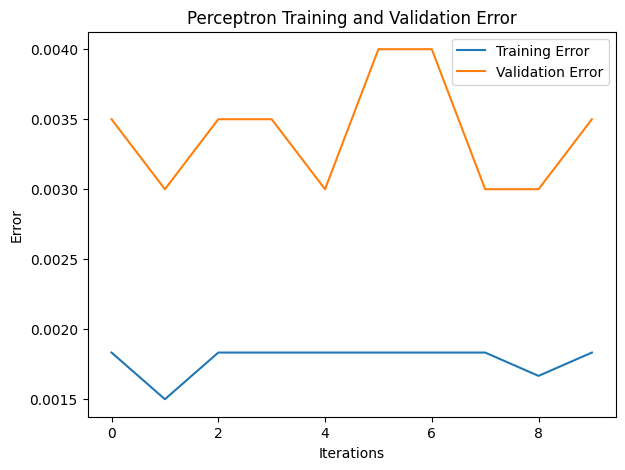

In [15]:
# Plotting the training and validation errors
plt.figure(figsize=(15, 5))

# Perceptron
plt.subplot(1, 2, 1)
plt.plot(train_errors_perceptron, label='Training Error')
plt.plot(val_errors_perceptron, label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Perceptron Training and Validation Error')
plt.legend()
plt.show()

### Adaline implementation

In [18]:
# Training the Adaline using SGDClassifier with a linear activation
adaline = SGDClassifier(loss='squared_error', max_iter=10, tol=1e-3, learning_rate='constant', eta0=0.01)
adaline.fit(X_train, y_train)

SGDClassifier(eta0=0.01, learning_rate='constant', loss='squared_error',
              max_iter=10)

### Accuracy

In [20]:
y_test_pred_adaline = adaline.predict(X_test)
accuracy_test_adaline = accuracy_score(y_test, y_test_pred_adaline)

In [21]:
accuracy_test_perceptron

0.9965

### Plot training and validation error for Adaline

In [22]:
train_errors_adaline = []
val_errors_adaline = []

for _ in range(10):
    adaline.partial_fit(X_train, y_train, classes=np.unique(y_train))
    y_train_pred = adaline.predict(X_train)
    y_val_pred = adaline.predict(X_val)
    train_errors_adaline.append(1 - accuracy_score(y_train, y_train_pred))
    val_errors_adaline.append(1 - accuracy_score(y_val, y_val_pred))

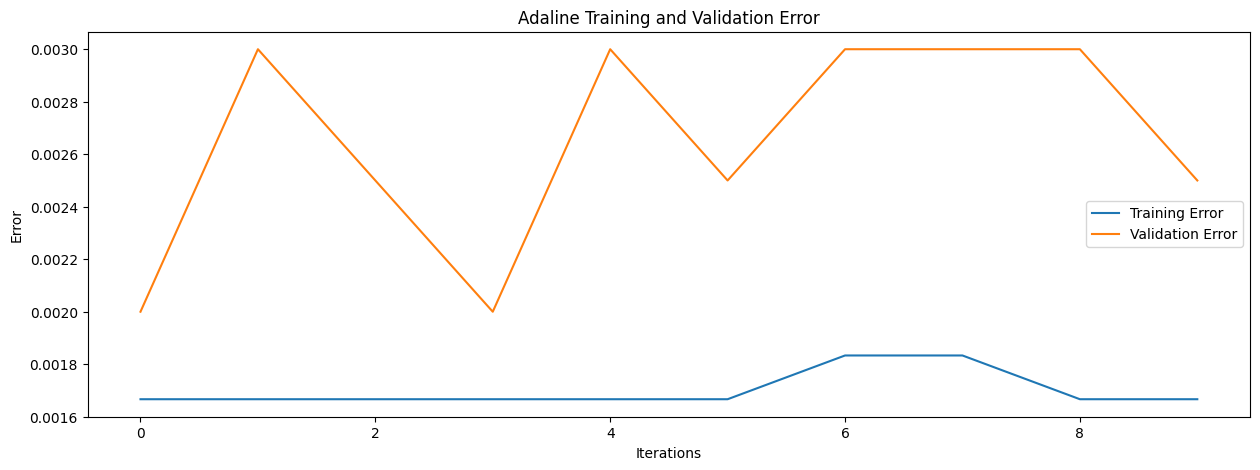

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(train_errors_adaline, label='Training Error')
plt.plot(val_errors_adaline, label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Adaline Training and Validation Error')
plt.legend()

plt.show()